# Bioinformatics HW3 – Practical

- Full Name:  Radin Baharsefat 
- Student Id: 402105762

#### Note: Each Theory question answer is written upon the code of that part.



# Part 1: Data Download and Preparation

## 1.1 Load Expression Matrix

In [1]:
counts <- read.delim(
  "GSE270045_LC_counts.tsv",
  header = TRUE,
  row.names = 1,
  check.names = FALSE
)
# Look at count matrix column names
head(colnames(counts))


[1] "CCI031" "CCI041" "CCI042" "CCI050" "CCI064" "CCI069"

## 1.2 Dimensions of the Expression Matrix

The matrix has rows and columns.
Rows are genes.
Columns are samples.
Each value is gene expression in one sample

In [2]:
dim(counts)

[1] 28889    36

## 1.3 Inspect Expression Values and 5S_rRNA
The first rows show gene names.
The first columns show sample names.
5S_rRNA has very low values.
It is often not captured well in RNA-seq.
It can be filtered out.

In [3]:

counts[1:5, 1:5]
counts["5S_rRNA", ]
summary(as.numeric(counts["5S_rRNA", ]))


,CCI031,CCI041,CCI042,CCI050,CCI064
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5S_rRNA,0.000000,0.00000,0.000000,0.00000,0.00000
A1BG,92.103500,105.87411,85.063750,110.46840,52.29464
A1CF,9.103139,25.11204,8.072486,12.13559,10.09736
A2M,60.021740,125.18732,129.918560,145.73940,98.72202
A2ML1,13.652440,39.72340,21.217640,33.96565,7.28073


,CCI031,CCI041,CCI042,CCI050,CCI064,CCI069,CCI077,CCI088,CCI12,CCI136,⋯,S029_11,S030_11,S032_11,S033_11,S034_11,S035_11,S038_11,S039_11,S041_11,S042_11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5S_rRNA,0,0,0,0,0,1.0116,0,0,0,1.15624,⋯,1,0.116938,0,0,0,1,0,0,0,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1777  0.0000  1.2540 

## 1.4 Basic Quality Control
There are no NA values.
There are no negative values.
The minimum is zero.
The maximum is large.
This matches RNA-seq count data.

In [4]:

any(is.na(counts))
any(counts < 0)
range(counts)
summary(as.numeric(as.matrix(counts)))


[1] FALSE

[1] FALSE

[1]     0.00 95726.72

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     0.000     4.622   116.946    60.607 95726.724 

## 1.5 – Raw counts vs normalized 
Values are integers.
There are many zeros.
There are no decimals.
The data are raw counts.
They are not normalized yet.
This is why limma-voom is used.

In [5]:

all(counts == floor(counts))
any(counts %% 1 != 0)


[1] FALSE

[1] TRUE

## 1.6 Library size
Library size is the column sum.
Some samples have larger library size.
Some samples have smaller library size.
The difference can be large.
This affects differential analysis.
Normalization is needed. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 647289 2212155 3120772 3378446 4161133 8678469 

S034_11 
     31

S042_11 
     36

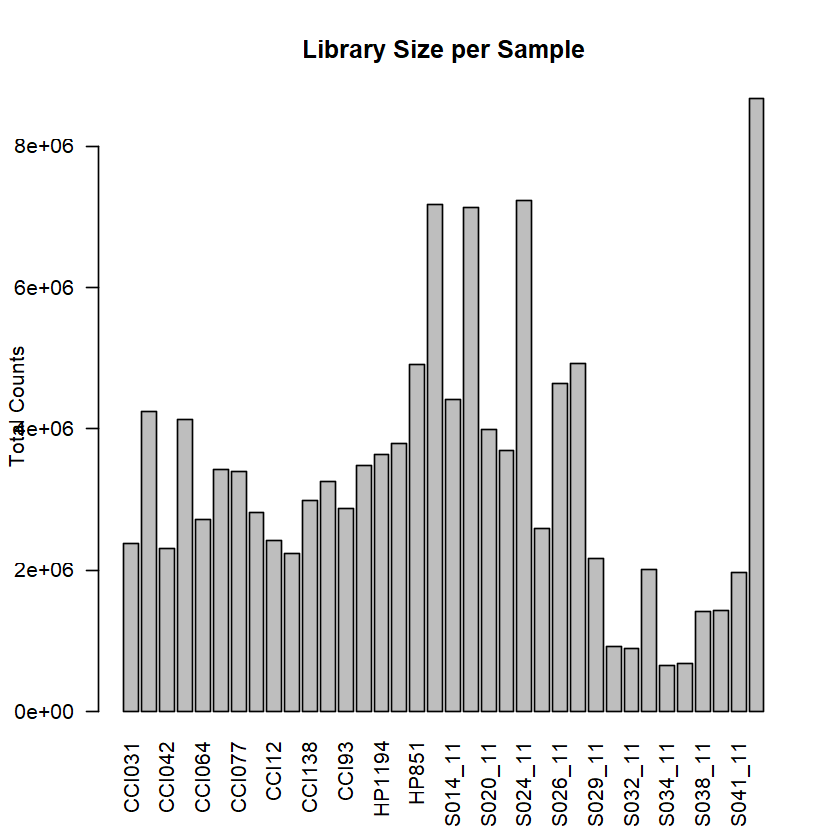

In [6]:

library_size <- colSums(counts)
summary(library_size)
which.min(library_size)
which.max(library_size)

barplot(
  library_size,
  las = 2,
  main = "Library Size per Sample",
  ylab = "Total Counts"
)


## 1.7 – Unusual observations
Some genes have zero counts everywhere.
Some samples have very large totals.
This is normal in RNA-seq.
Filtering helps reduce noise

In [7]:

sum(rowSums(counts) == 0)
library_size[order(library_size)]


[1] 4642

S034_11   S035_11   S032_11   S030_11   S038_11   S039_11   S041_11   S033_11 
 647288.5  681044.9  896464.4  914928.3 1417882.1 1430586.6 1960506.6 2015850.5 
  S029_11    CCI136    CCI042    CCI031     CCI12   S025_11    CCI064    CCI088 
2158896.2 2229907.4 2300501.5 2383583.6 2427171.8 2596175.2 2721693.4 2819476.7 
    CCI93    CCI138     CCI58    CCI077    CCI069    HP1193    HP1194   S023_11 
2870250.8 2991846.3 3249697.9 3393794.0 3424618.6 3477953.6 3642627.1 3693544.7 
   HP1301   S020_11    CCI050    CCI041   S014_11   S026_11     HP851   S027_11 
3790639.8 3986680.8 4131167.0 4251029.4 4417882.3 4645008.5 4912093.9 4918891.8 
  S016_11   S013_11   S024_11   S042_11 
7129418.6 7181587.0 7234882.6 8678469.0

# Part 1 Questions

## Question 1
**Answer:**  
The counts file contains numerical gene expression values for samples. These values are required for statistical analysis. The Series Matrix file contains metadata and sample descriptions and cannot be used directly for expression analysis.

---

## Question 2
**Answer:**  
The matrix dimensions show the number of genes in rows and the number of samples in columns. This helps understand the structure and size of data.

---

## Question 3
**Answer:**  
In RNA-seq experiments, rRNA is usually removed and usually polyA selection is used. Therefore, genes like 5S_rRNA show very low or zero expression, and that is as expected.

---

## Question 4
**Answer:**  
The decimal values shows that the data is not raw counts, because raw counts must be integers. The absence of negative values shows that the data are not log-transformed. Therefore, the data is preprocessed.

---

## Question 5
**Answer:**  
Library size is the sum of gene expression values in each sample and represents sequencing depth. Large differences can cause bias, so library size must be checked and normalized.

---

# Part 2: Sample Metadata Construction
## 2.1 Download GEO series and extract phenotype data
The table has many columns.
Columns include title and characteristics.
They describe each sample.

In [8]:
# Download GEO dataset
gse <- getGEO("GSE270045", GSEMatrix = TRUE)

gse <- gse[[1]]

pheno <- pData(gse)

head(pheno[, c("title", "characteristics_ch1")])


ERROR: Error in getGEO("GSE270045", GSEMatrix = TRUE): could not find function "getGEO"


## 2.2 Identify sample group (Control vs ME_CFS)
Disease status is in the title or characteristics.
Healthy controls are labeled clearly.
Patients have different labels.
A new group column is created.

In [ ]:
pheno$group <- ifelse(
  grepl("Healthy Control", pheno$title, ignore.case = TRUE),
  "Control",
  "ME_CFS"
)

table(pheno$group)



Control  ME_CFS 
     17      19 

# 2.3 Count samples in each group
Both groups are present.
Each sample belongs to one group.
The counts can be summarized in a table

In [ ]:
# Frequency table of groups
table(pheno$group)


Control  ME_CFS 
     17      19 

# 2.4 Extract real sample IDs
Sample IDs are embedded in text.
They look like CCI031 or S013_11.
They are extracted as clean IDs.
A new column is called sample_id.

In [ ]:
pheno$sample_id <- pheno$`sample id:ch1`
head(pheno$sample_id)



[1] "CCI031" "CCI041" "CCI042" "CCI050" "CCI064" "CCI069"

# 2.5/2.6 Match metadata with expression matrix
Sample names must match exactly.
Order must also match.
Each column matches one row.
This avoids wrong labels.

In [ ]:
pheno <- pheno[match(colnames(counts), pheno$sample_id), ]
all(colnames(counts) == pheno$sample_id)
metadata <- data.frame(
  sample_id = pheno$sample_id,
  group = pheno$group,
  row.names = pheno$sample_id,
  stringsAsFactors = FALSE
)

head(metadata)
dim(metadata)



[1] TRUE

,sample_id,group
,<chr>,<chr>
CCI031,CCI031,Control
CCI041,CCI041,Control
CCI042,CCI042,Control
CCI050,CCI050,Control
CCI064,CCI064,Control
CCI069,CCI069,Control


[1] 36  2

# Part 2 Questions

## Question 1
**Answer:**  
The title column was most helpful because it directly indicates whether a sample is a Healthy Control or not.

---

## Question 2
**Answer:**  
There are 17 Control samples and 19 ME_CFS samples. The groups are well balanced and suitable for analysis.

---

## Question 3
**Answer:**  
This makes us sure that expression values are mapped to the correct samples. If they don't match, samples may be mapped to the wrong group and results will not be correct.

---

## Question 4
**Answer:**  
This reduces the ability to detect real differences between groups and increases noise in the results.

---

## Question 5
**Answer:**  
Using Control as the reference makes logFC values easier to understand. Positive logFC means higher expression in ME_CFS and negative logFC means lower expression.

---

# Part 3: Exploratory Analysis of Gene Expression

## 3.1 Summary Statistics
Minimum is zero.
Maximum is very large.
Median is small.
Most values are low.
There are no negatives.
There are no NA values.
This looks like raw counts.

In [ ]:

summary(as.vector(as.matrix(counts)))
any(is.na(counts))
any(counts < 0)
range(counts)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     0.000     4.622   116.946    60.607 95726.724 

[1] FALSE

[1] FALSE

[1]     0.00 95726.72


## 3.2 Library Size Calculation & Library Size Barplot
Library size reflects sequencing depth.
Some samples are deeper sequenced.
Bar plots show the differences.
Groups can be compared visually.

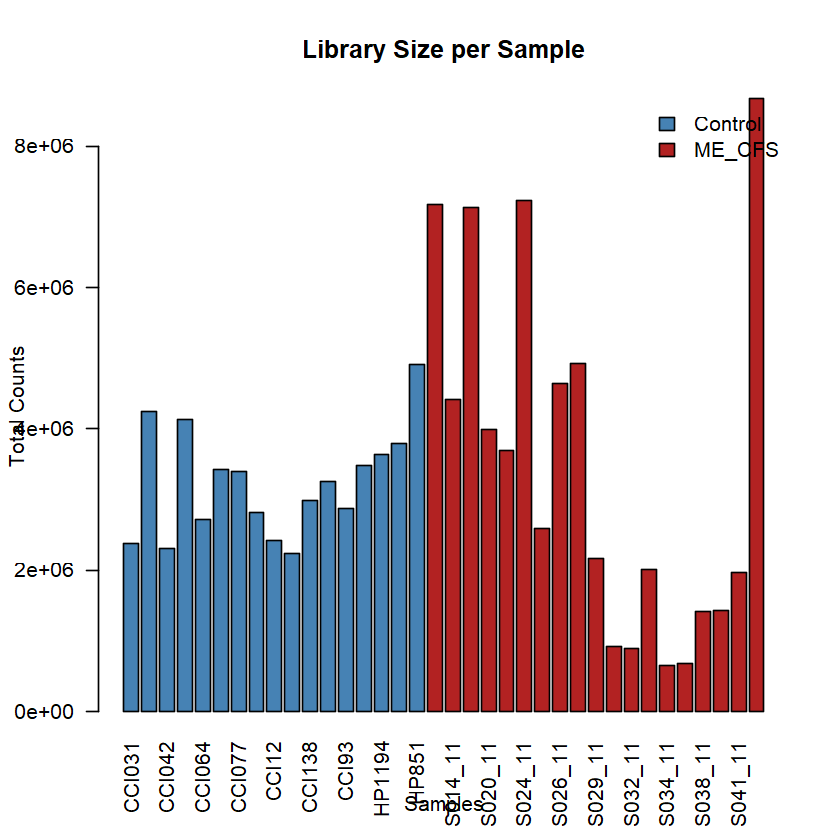

In [ ]:
library_size <- colSums(counts)

group_colors <- ifelse(
  metadata$group == "Control",
  "steelblue",
  "firebrick"
)

barplot(
  library_size,
  las = 2,
  col = group_colors,
  main = "Library Size per Sample",
  ylab = "Total Counts",
  xlab = "Samples"
)

legend(
  "topright",
  legend = c("Control", "ME_CFS"),
  fill = c("steelblue", "firebrick"),
  bty = "n"
)


## 3.3 Log2 Transformation and Boxplot
Most samples have similar shapes.
Medians are close.
Some samples differ slightly.
Large differences may indicate technical effects.

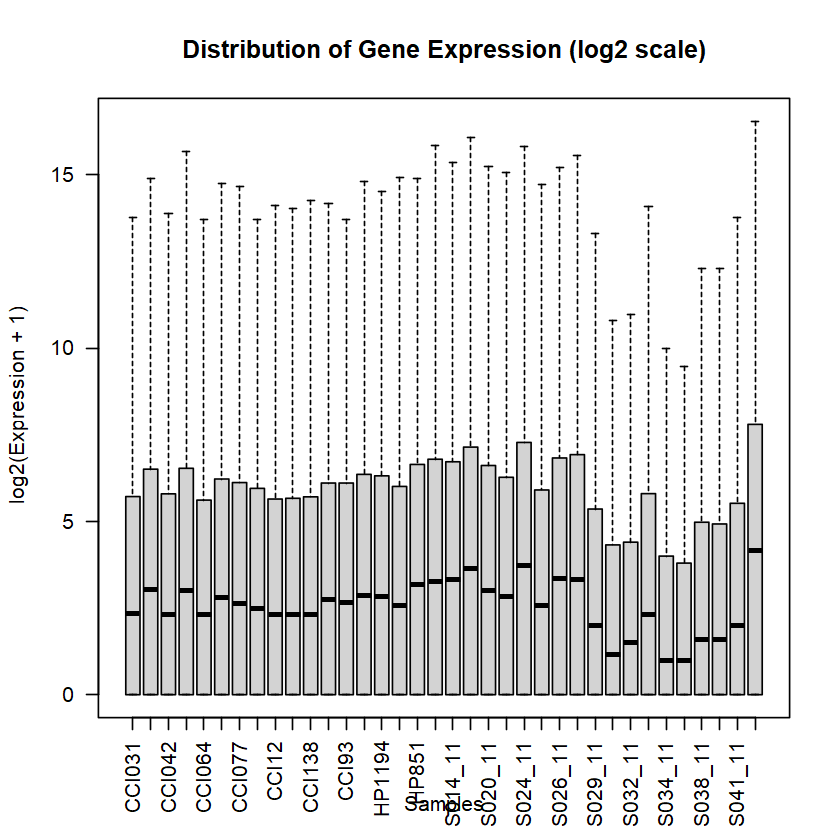

In [ ]:
log_counts <- log2(counts + 1)
boxplot(
  log_counts,
  las = 2,
  outline = FALSE,
  main = "Distribution of Gene Expression (log2 scale)",
  ylab = "log2(Expression + 1)",
  xlab = "Samples"
)



## 3.4 Mean–Variance Trend Using voom
Variance increases with the mean.
The relationship is not constant.
voom models this trend.
It gives weights for limma.

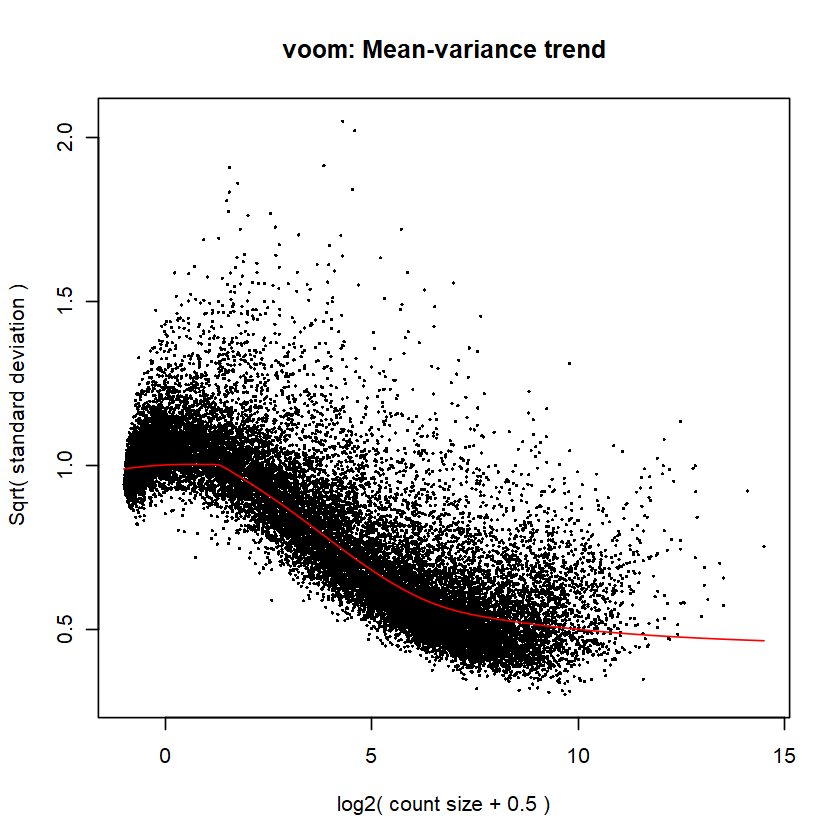

In [ ]:
library(edgeR)
library(limma)

dge <- DGEList(counts = counts)

group <- factor(metadata$group)

design <- model.matrix(~ group)

dge <- calcNormFactors(dge)

v <- voom(dge, design, plot = TRUE)


# Part 3 Questions

## Question 1
**Answer:**  
The data has many zeros and large values, which is normal for RNA-seq. Decimal values and non neg values show that the data is not raw counts.

---

## Question 2
**Answer:**  
Some samples have much smaller or larger library sizes. However, no strong systematic difference between groups is observed.

---

## Question 3
**Answer:**  
Most samples have similar distributions. Samples with different distributions may be due to technical issues or biological variation.

---

## Question 4
**Answer:**  
The voom plot shows that variance decreases as mean expression increases. This relationship is needed for proper modeling.

---

## Question 5
**Answer:**  
DESeq2 assumes integer counts. These data contain decimal values. limma-voom is suitable for this type of data.

---

# Part 4: PCA Analysis
## 4.1 Log2 Transformation

In [ ]:
log_counts <- log2(counts + 1)


## 4.2 Remove Low-Variance Genes

In [ ]:
gene_variance <- apply(log_counts, 1, var)


## 4.3 Perform PCA


PC1 explains the largest variance.
PC2 explains less.
PC3 explains even less.
Most structure is in PC1 and PC2
RNA-seq data are already log-scaled.
Scaling inflates noise from low genes.
scale.=FALSE preserves structure.
scale.=TRUE would distort PCA.

In [ ]:

log_counts_filt <- log_counts[gene_variance > 0, ]
pca_res <- prcomp(
  t(log_counts_filt),
  scale. = FALSE
)


## 4.4 Variance Explained

In [ ]:
pca_var <- (pca_res$sdev^2) / sum(pca_res$sdev^2) * 100

pca_var[1:5]



[1] 59.900773  4.537189  3.439810  1.608497  1.561661

## 4.5 PCA Plot (PC1 vs PC2)
Samples may partially separate by group.
Some overlap is expected.
Clear separation suggests strong signal.
Using raw counts instead of log2

Raw counts have extreme ranges.
Highly expressed genes dominate PCA.
The plot would be misleading.
Log transform is necessary

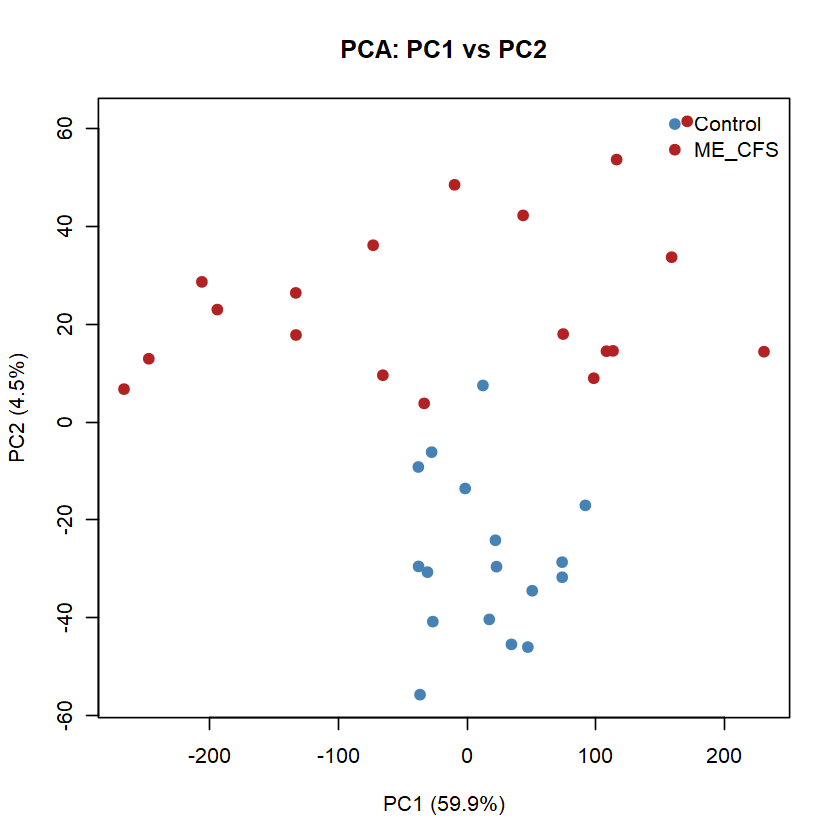

In [ ]:
group_colors <- ifelse(
  metadata$group == "Control",
  "steelblue",
  "firebrick"
)

plot(
  pca_res$x[, 1],
  pca_res$x[, 2],
  col = group_colors,
  pch = 19,
  xlab = paste0("PC1 (", round(pca_var[1], 1), "%)"),
  ylab = paste0("PC2 (", round(pca_var[2], 1), "%)"),
  main = "PCA: PC1 vs PC2"
)

legend(
  "topright",
  legend = c("Control", "ME_CFS"),
  col = c("steelblue", "firebrick"),
  pch = 19,
  bty = "n"
)


## 4.6 Scree Plot
Some samples may be far away.
These are possible outliers.
They can be technical or biological
Low-variance genes add noise.
They do not help clustering.
Removing them improves PCA clarity

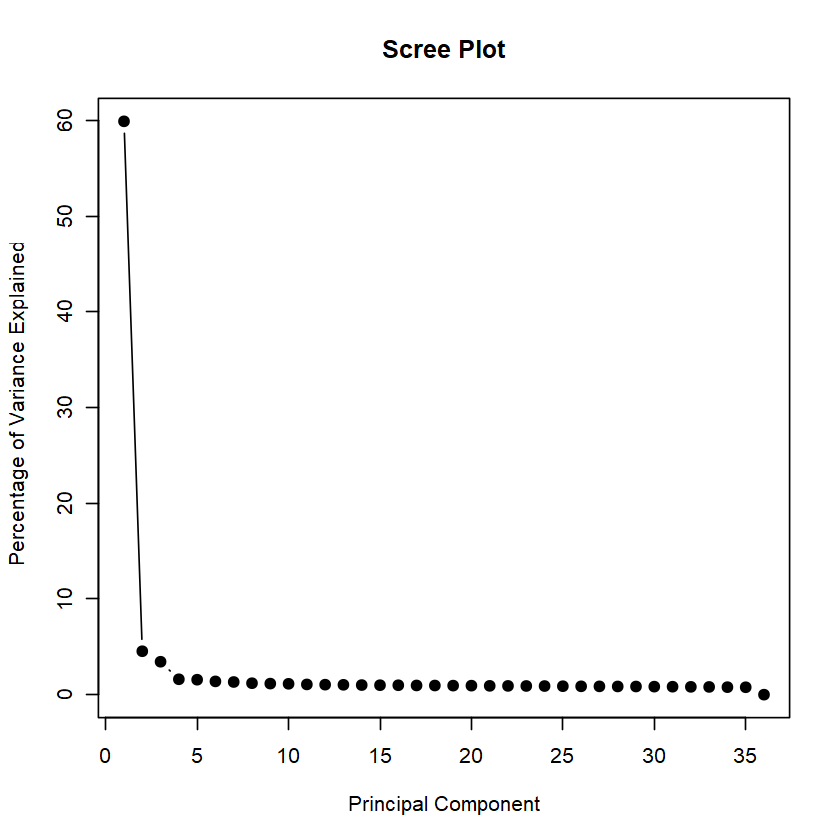

In [ ]:
plot(
  pca_var,
  type = "b",
  pch = 19,
  xlab = "Principal Component",
  ylab = "Percentage of Variance Explained",
  main = "Scree Plot"
)




# Part 4 Questions

## Question 1
**Answer:**  
PC1 is about 60 percent of the total variance. This tells us about a dominant pattern in the data.

---

## Question 2
**Answer:**  
There is partial separation between the two groups. This suggests overall expression differences.

---

## Question 3
**Answer:**  
Some samples are far from the main cluster. This may be due to low quality, technical error, or real biological differences.

---

## Question 4
**Answer:**  
Low-variance genes do not help separate samples and add noise. Removing them improves PCA results.

---

## Question 5
**Answer:**  
Scaling can overemphasize noise from low-expression genes. Using scale = FALSE preserves the real data structure.

---

## Question 6
**Answer:**  
Highly expressed genes would dominate PCA and hide true sample differences.

---

# Part 5: Differential Expression Analysis with limma-voom
## 5.1 Create DGEList and Normalize

In [ ]:
library(edgeR)
library(limma)

dge <- DGEList(counts = counts)

dge <- calcNormFactors(dge)


## 5.2 Filter Lowly Expressed Genes
It removes very low expressed genes.
These genes add noise.
They reduce statistical power

In [ ]:
group <- factor(metadata$group)

keep <- filterByExpr(dge, group = group)

dge <- dge[keep, , keep.lib.sizes = FALSE]

dim(dge)


[1] 13154    36

## 5.3 Design Matrix

In [ ]:
design <- model.matrix(~ group)
colnames(design)


[1] "(Intercept)" "groupME_CFS"

## 5.4 voom Transformation
It shows mean–variance dependency.
Variance decreases after weighting.
This fits limma assumptions.

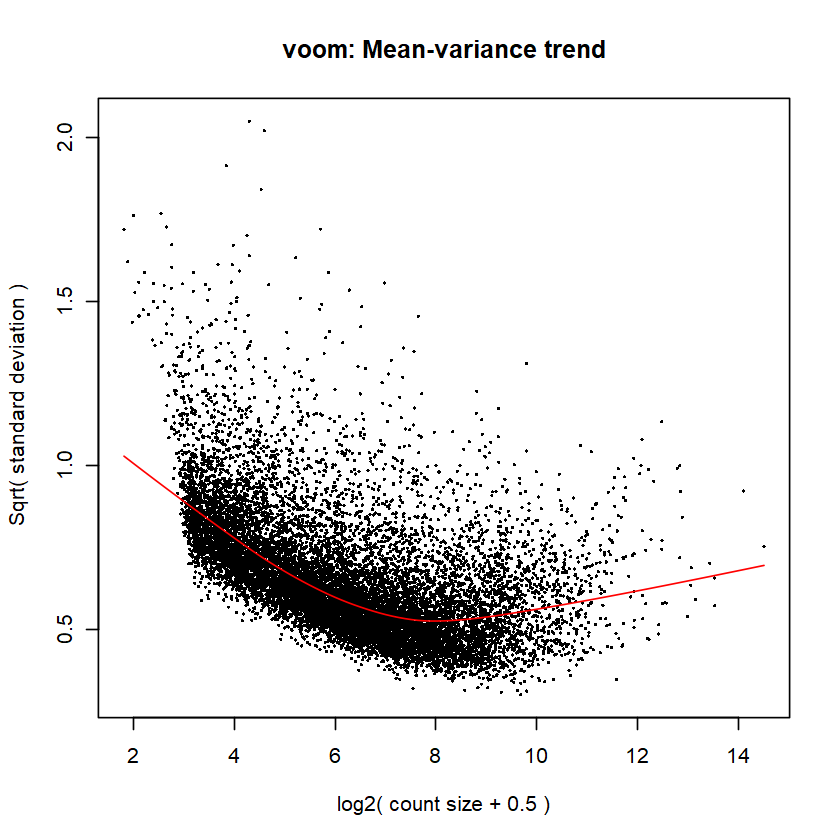

In [ ]:
v <- voom(dge, design, plot = TRUE)


## 5.5 Linear Model and Empirical Bayes

In [ ]:
fit <- lmFit(v, design)

fit <- eBayes(fit)


## 5.6 Differential Expression Results
logFC shows direction of change.
Positive means higher in ME_CFS.
Negative means higher in Control.
adj.P.Val shows significance

In [ ]:
results <- topTable(
  fit,
  coef = "groupME_CFS",
  number = Inf,
  sort.by = "P"
)

head(results)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TAF1D,0.9581605,6.205309,13.16852,8.079353e-16,1.062758e-11,25.87314
ZBTB7A,-0.7333257,7.490320,-12.53425,3.794291e-15,1.777182e-11,24.36227
PLEC,-0.9974258,9.253662,-12.50762,4.053175e-15,1.777182e-11,24.18621
MAP1S,-0.9028363,6.113502,-12.37356,5.658331e-15,1.860742e-11,23.98593
SCAF1,-0.9881491,6.492985,-12.27906,7.168015e-15,1.885761e-11,23.75792
CIC,-0.8474059,7.763672,-12.18278,9.131279e-15,2.001881e-11,23.50194


In [ ]:
sig_genes <- results[
  results$adj.P.Val < 0.05 & abs(results$logFC) > 1,
]

nrow(sig_genes)
head(sig_genes)


[1] 169

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM83A,2.539641,5.882152,11.570581,4.373754e-14,5.230214e-11,21.95210
FASN,-1.120292,5.753654,-10.328107,1.218126e-12,4.626127e-10,18.74619
SCRIB,-1.022090,5.594503,-10.253940,1.495180e-12,4.796974e-10,18.54462
PGAP1,1.142242,3.893788,9.728764,6.513005e-12,1.157731e-09,16.96397
MORC4,1.024988,7.426405,9.334623,2.011653e-11,2.544354e-09,15.99778
GRN,-1.114086,8.968077,-8.836432,8.605608e-11,7.648524e-09,14.58193


## 5.7 Volcano Plot

Some genes are strongly significant.
Some are upregulated.
Some are downregulated.
Both directions are present.

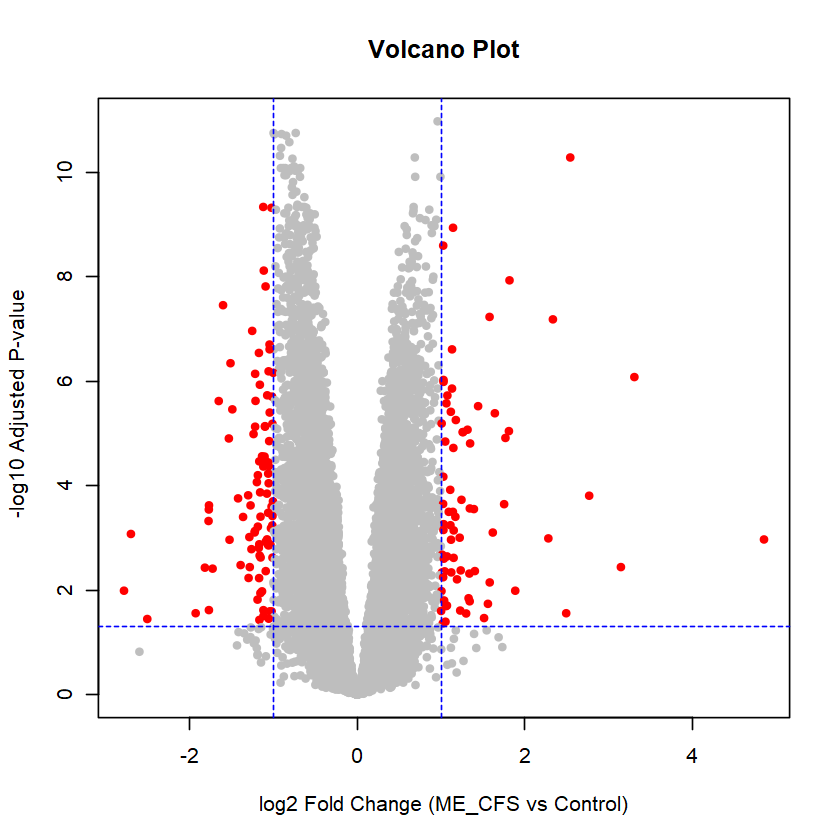

In [ ]:
plot(
  results$logFC,
  -log10(results$adj.P.Val),
  pch = 20,
  col = ifelse(
    results$adj.P.Val < 0.05 & abs(results$logFC) > 1,
    "red",
    "grey"
  ),
  xlab = "log2 Fold Change (ME_CFS vs Control)",
  ylab = "-log10 Adjusted P-value",
  main = "Volcano Plot"
)

abline(v = c(-1, 1), col = "blue", lty = 2)
abline(h = -log10(0.05), col = "blue", lty = 2)


## 5.8 Heatmap of Top Differentially Expressed Genes

Genes passing thresholds are selected.
This number shows effect strength.
More genes means stronger differences

Samples usually cluster by group.
This supports biological signal.
Unexpected samples may be noisy.
Positive logFC means ME_CFS > Control.
Negative logFC means Control > ME_CFS.
It is always relative to reference group.

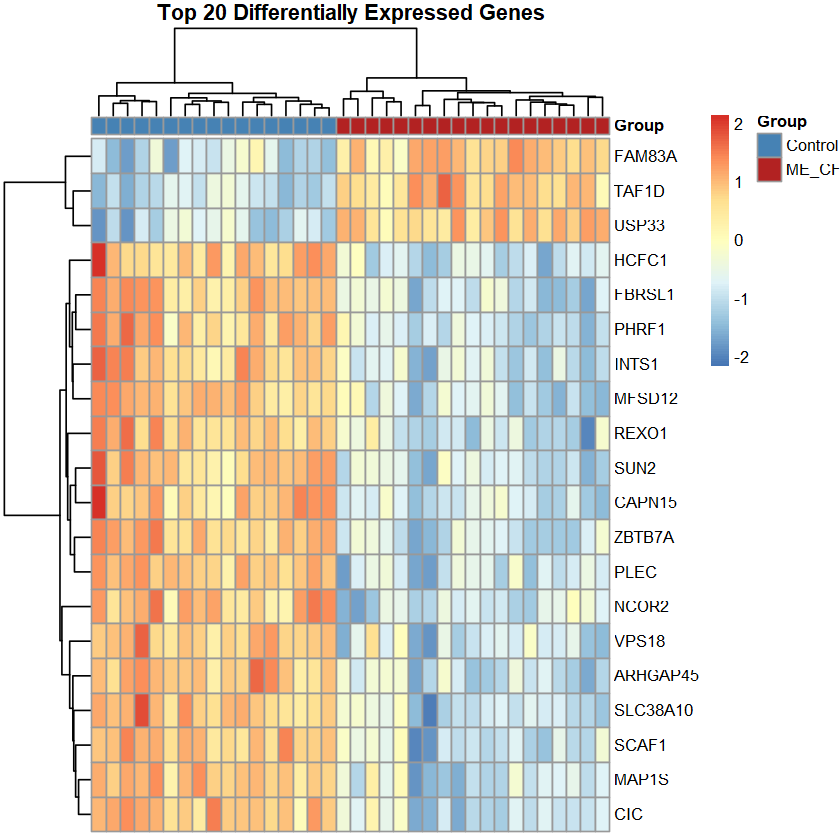

In [ ]:
library(pheatmap)
annotation_col <- data.frame(
  Group = metadata$group
)
rownames(annotation_col) <- colnames(v$E)
annotation_colors <- list(
  Group = c(
    Control = "steelblue",
    ME_CFS = "firebrick"
  )
)


top20_genes <- rownames(results)[1:20]

pheatmap(
  v$E[top20_genes, ],
  scale = "row",
  annotation_col = annotation_col,
  annotation_colors = annotation_colors,
  show_colnames = FALSE,
  main = "Top 20 Differentially Expressed Genes"
)



# Part 5 Questions

## Question 1
**Answer:**  
It removes genes with very low expression. This reduces noise and improves differential expression analysis.

---

## Question 2
**Answer:**  
It shows the mean-variance relationship and allows proper weighting in linear models.

---

## Question 3
**Answer:**  
They have small adjusted p-values and show strong expression differences between groups.

---

## Question 4
**Answer:**  
Both upregulated and downregulated genes are present. Expression changes occur in both directions.

---

## Question 5
**Answer:**  
A meaningful number of significant genes indicates real expression differences between ME_CFS and Control.

---

## Question 6
**Answer:**  
Most samples cluster by group. Unexpected samples may reflect biological variability.

---

## Question 7
**Answer:**  
Positive logFC means higher expression in ME_CFS. Negative logFC means lower expression in ME_CFS.